<a href="https://colab.research.google.com/github/nafiul-araf/Image-Segmentation-using-CNN-with-Data-Augmentation/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

In [ ]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

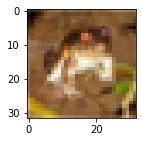

In [ ]:
plt.figure(figsize=(15,2))
plt.imshow(X_train[0])

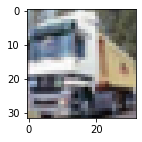

In [ ]:
plt.figure(figsize=(15,2))
plt.imshow(X_train[1])

In [ ]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def plot_sample(X,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

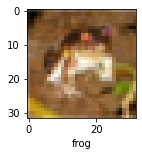

In [ ]:
plot_sample(X_train,y_train,0)

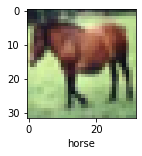

In [ ]:
plot_sample(X_train,y_train,7)

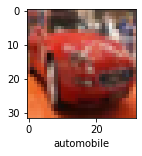

In [ ]:
plot_sample(X_train,y_train,5)

In [ ]:
X_train=X_train/255
X_test=X_test/255

In [ ]:
ann=models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 74s 47ms/step - loss: 1.9315 - accuracy: 0.3037
Epoch 2/10
1563/1563 [==============================] - 73s 47ms/step - loss: 1.6415 - accuracy: 0.4214
Epoch 3/10
1563/1563 [==============================] - 73s 46ms/step - loss: 1.5506 - accuracy: 0.4479
Epoch 4/10
1563/1563 [==============================] - 74s 47ms/step - loss: 1.4886 - accuracy: 0.4788
Epoch 5/10
1563/1563 [==============================] - 73s 47ms/step - loss: 1.4294 - accuracy: 0.4972
Epoch 6/10
1563/1563 [==============================] - 74s 47ms/step - loss: 1.3849 - accuracy: 0.5123
Epoch 7/10
1563/1563 [==============================] - 74s 47ms/step - loss: 1.3585 - accuracy: 0.5224
Epoch 8/10
1563/1563 [==============================] - 74s 47ms/step - loss: 1.3119 - accuracy: 0.5368
Epoch 9/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.2827 - accuracy: 0.5517
Epoch 10/10
1563/1563 [==============================] - 73s 47m

In [ ]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 6s 20ms/step - loss: 1.4637 - accuracy: 0.4789


[1.4637327194213867, 0.4788999855518341]

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred=ann.predict(X_test)
y_pred_classes=[np.argmax(i) for i in y_pred]

print("Classification Report: \n", classification_report(y_test,y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.54      0.61      0.57      1000
           1       0.68      0.56      0.62      1000
           2       0.47      0.18      0.26      1000
           3       0.40      0.24      0.30      1000
           4       0.28      0.74      0.41      1000
           5       0.48      0.38      0.42      1000
           6       0.50      0.62      0.55      1000
           7       0.75      0.35      0.48      1000
           8       0.50      0.75      0.60      1000
           9       0.73      0.37      0.49      1000

    accuracy                           0.48     10000
   macro avg       0.53      0.48      0.47     10000
weighted avg       0.53      0.48      0.47     10000



In [ ]:
cnn=models.Sequential([
        
        layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
        layers.MaxPooling2D((2,2)),               
               

        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 52s 33ms/step - loss: 1.7297 - accuracy: 0.3654
Epoch 2/10
1563/1563 [==============================] - 52s 33ms/step - loss: 1.1665 - accuracy: 0.5878
Epoch 3/10
1563/1563 [==============================] - 52s 33ms/step - loss: 1.0203 - accuracy: 0.6446
Epoch 4/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.9338 - accuracy: 0.6771
Epoch 5/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.8821 - accuracy: 0.6955
Epoch 6/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.8107 - accuracy: 0.7197
Epoch 7/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.7745 - accuracy: 0.7313
Epoch 8/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.7304 - accuracy: 0.7453
Epoch 9/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.6905 - accuracy: 0.7617
Epoch 10/10
1563/1563 [==============================] - 52s 33m

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.9645 - accuracy: 0.6842


[0.9645218849182129, 0.6841999888420105]

In [ ]:
y_pred=cnn.predict(X_test)
y_pred_classes_cnn=[np.argmax(i) for i in y_pred]

In [ ]:
print("Classification Report: \n", classification_report(y_test,y_pred_classes_cnn))

Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.69      0.73      1000
           1       0.80      0.78      0.79      1000
           2       0.72      0.39      0.51      1000
           3       0.54      0.42      0.47      1000
           4       0.64      0.63      0.63      1000
           5       0.52      0.72      0.60      1000
           6       0.68      0.85      0.76      1000
           7       0.73      0.74      0.73      1000
           8       0.83      0.76      0.79      1000
           9       0.67      0.86      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



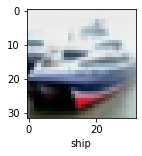

In [ ]:
y_test=y_test.reshape(-1,)
plot_sample(X_test,y_test,1)

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [ ]:
y_pred_classes_cnn[:5]

[3, 8, 8, 0, 4]

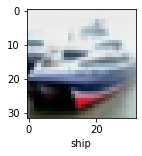

In [ ]:
plot_sample(X_test,y_test,1)

In [ ]:
classes[y_pred_classes_cnn[1]]

'ship'

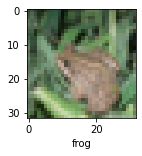

In [ ]:
plot_sample(X_test,y_test,4)

In [ ]:
classes[y_pred_classes_cnn[4]]

'deer'

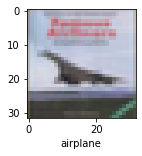

In [ ]:
plot_sample(X_test,y_test,3)

In [ ]:
classes[y_pred_classes_cnn[3]]

'airplane'

In [ ]:
(X_train_100,y_train_100),(X_test_100,y_test_100)=datasets.cifar100.load_data()

In [ ]:
X_train_100.shape,X_test_100.shape,y_train_100.shape,y_test_100.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

In [ ]:
X_test_100[0]

array([[[199, 215, 249],
        [196, 211, 244],
        [195, 210, 243],
        ...,
        [216, 231, 250],
        [217, 231, 250],
        [224, 234, 252]],

       [[197, 210, 239],
        [195, 208, 238],
        [195, 210, 240],
        ...,
        [231, 243, 250],
        [233, 243, 250],
        [241, 245, 253]],

       [[222, 226, 246],
        [213, 220, 242],
        [209, 219, 243],
        ...,
        [243, 250, 251],
        [244, 249, 251],
        [250, 250, 253]],

       ...,

       [[ 72,  73,  99],
        [ 71,  74, 102],
        [ 74,  78, 108],
        ...,
        [220, 208, 217],
        [183, 168, 181],
        [155, 141, 150]],

       [[ 72,  75, 104],
        [ 76,  81, 111],
        [ 84,  89, 122],
        ...,
        [222, 212, 220],
        [187, 174, 192],
        [145, 132, 149]],

       [[ 80,  85, 118],
        [ 84,  90, 123],
        [ 85,  92, 127],
        ...,
        [217, 207, 215],
        [207, 194, 211],
        [176, 164, 183]]

In [ ]:
y_train_100[:5]

array([[19],
       [29],
       [ 0],
       [11],
       [ 1]])

In [ ]:
y_train_100=y_train_100.reshape(-1,)
y_train_100[:5]

array([19, 29,  0, 11,  1])

In [ ]:
superclass=['aquatic mammals','fish','flowers','food containers','fruit and vegetables','household electrical devices','household furniture','insects','large carnivores','large man-made outdoor things','large natural outdoor scenes','large omnivores and herbivores','medium-sized mammals','non-insect invertebrates','people','reptiles','small mammals','trees','vehicles 1','vehicles 2']

In [ ]:
def plt_sample(X,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])

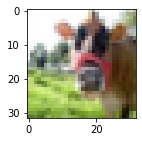

In [ ]:
plt_sample(X_train,y_train,0)

# ***Data Augmentation***

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228818944/228813984 [==============================] - 1s 0us/step


In [ ]:
data_dir

'./datasets/flower_photos'

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [ ]:
list(data_dir.glob('*/*.jpg'))

[PosixPath('datasets/flower_photos/daisy/476857510_d2b30175de_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/3750250718_eb61146c5f.jpg'),
 PosixPath('datasets/flower_photos/daisy/8671824531_64b816949e_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/450128527_fd35742d44.jpg'),
 PosixPath('datasets/flower_photos/daisy/8932490012_cc08e690ba_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/8882282142_9be2524d38_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/705422469_ffa28c566d.jpg'),
 PosixPath('datasets/flower_photos/daisy/3483303007_42e3f90da7.jpg'),
 PosixPath('datasets/flower_photos/daisy/5679288570_b4c52e76d5.jpg'),
 PosixPath('datasets/flower_photos/daisy/10466558316_a7198b87e2.jpg'),
 PosixPath('datasets/flower_photos/daisy/5435513198_90ce39f1aa_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/3598615130_578ed30e5f.jpg'),
 PosixPath('datasets/flower_photos/daisy/21805938544_bf6bb0e4bc.jpg'),
 PosixPath('datasets/flower_photos/daisy/5087720485_c0914fb623.jpg'),
 PosixPath(

In [ ]:
len(list(data_dir.glob('*/*.jpg')))

3670

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [ ]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/17305246720_1866d6303b.jpg'),
 PosixPath('datasets/flower_photos/roses/3560426426_1c66cb8330.jpg'),
 PosixPath('datasets/flower_photos/roses/5570018782_c56bee942f.jpg'),
 PosixPath('datasets/flower_photos/roses/5249566718_6109630c83_m.jpg'),
 PosixPath('datasets/flower_photos/roses/8502529435_c6e40d0df4.jpg')]

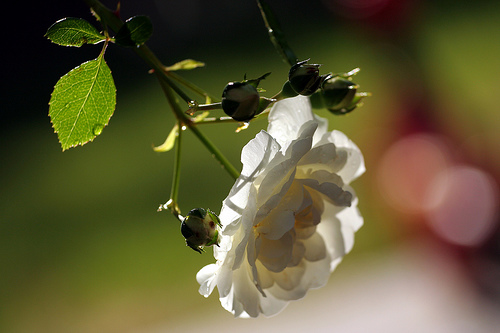

In [ ]:
PIL.Image.open(str(roses[1]))

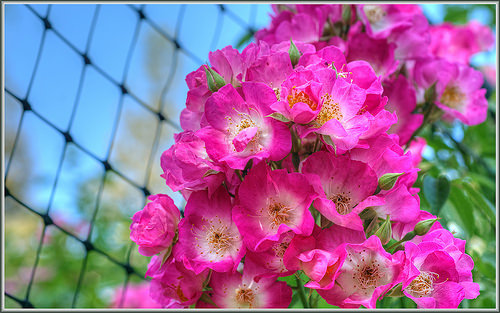

In [ ]:
PIL.Image.open(str(roses[0]))

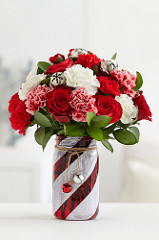

In [ ]:
PIL.Image.open(str(roses[9]))

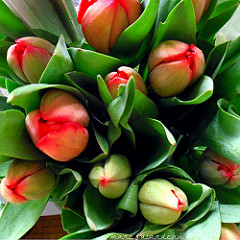

In [ ]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [ ]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [ ]:
flowers_images_dict['daisy']

[PosixPath('datasets/flower_photos/daisy/476857510_d2b30175de_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/3750250718_eb61146c5f.jpg'),
 PosixPath('datasets/flower_photos/daisy/8671824531_64b816949e_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/450128527_fd35742d44.jpg'),
 PosixPath('datasets/flower_photos/daisy/8932490012_cc08e690ba_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/8882282142_9be2524d38_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/705422469_ffa28c566d.jpg'),
 PosixPath('datasets/flower_photos/daisy/3483303007_42e3f90da7.jpg'),
 PosixPath('datasets/flower_photos/daisy/5679288570_b4c52e76d5.jpg'),
 PosixPath('datasets/flower_photos/daisy/10466558316_a7198b87e2.jpg'),
 PosixPath('datasets/flower_photos/daisy/5435513198_90ce39f1aa_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/3598615130_578ed30e5f.jpg'),
 PosixPath('datasets/flower_photos/daisy/21805938544_bf6bb0e4bc.jpg'),
 PosixPath('datasets/flower_photos/daisy/5087720485_c0914fb623.jpg'),
 PosixPath(

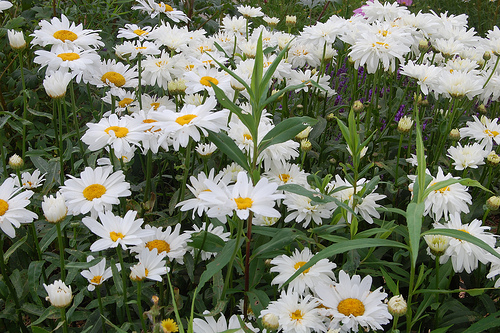

In [ ]:
PIL.Image.open(str(flowers_images_dict['daisy'][1]))

In [ ]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

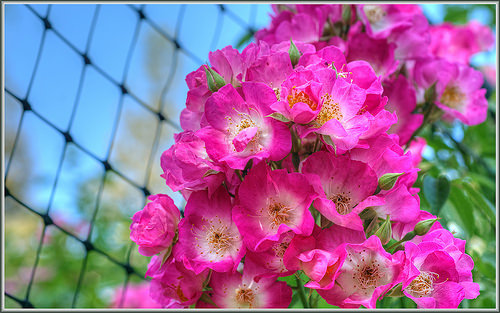

In [ ]:
PIL.Image.open(str(flowers_images_dict['roses'][0]))

In [ ]:
flowers_images_dict['roses'][0]

PosixPath('datasets/flower_photos/roses/17305246720_1866d6303b.jpg')

In [ ]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/17305246720_1866d6303b.jpg'

In [ ]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img[0]

array([[81, 84, 82],
       [55, 79, 55],
       [65, 64, 43],
       ...,
       [52, 60, 50],
       [66, 75, 65],
       [48, 59, 49]], dtype=uint8)

In [ ]:
img.shape

(313, 500, 3)

In [ ]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [ ]:
X, y = [], []

for flower_names, images in flowers_images_dict.items():
  print(flower_names)
  print(len(images))

roses
641
daisy
633
dandelion
898
sunflowers
699
tulips
799


In [ ]:
for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [ ]:
y[:5]

[0, 0, 0, 0, 0]

In [ ]:
X[0]

array([[[ 75,  95,  77],
        [ 86,  91,  88],
        [ 83,  97,  83],
        ...,
        [ 86,  92,  82],
        [ 88,  93,  84],
        [ 86,  95,  86]],

       [[113, 125, 108],
        [180, 188, 199],
        [181, 191, 199],
        ...,
        [199, 195, 197],
        [198, 197, 196],
        [147, 156, 146]],

       [[ 93, 106,  91],
        [206, 201, 184],
        [219, 175, 121],
        ...,
        [102, 139,  96],
        [161, 178, 149],
        [131, 139, 129]],

       ...,

       [[114, 114, 105],
        [190, 202, 192],
        [142, 178, 156],
        ...,
        [117, 164, 123],
        [174, 189, 173],
        [140, 145, 136]],

       [[105, 124, 110],
        [185, 185, 182],
        [203, 195, 193],
        ...,
        [180, 188, 175],
        [189, 183, 184],
        [145, 152, 141]],

       [[ 82,  85,  76],
        [ 81,  88,  78],
        [ 78,  89,  77],
        ...,
        [ 76,  87,  72],
        [ 78,  84,  74],
        [ 81,  88,  77]]

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
X[0]

array([[[ 75,  95,  77],
        [ 86,  91,  88],
        [ 83,  97,  83],
        ...,
        [ 86,  92,  82],
        [ 88,  93,  84],
        [ 86,  95,  86]],

       [[113, 125, 108],
        [180, 188, 199],
        [181, 191, 199],
        ...,
        [199, 195, 197],
        [198, 197, 196],
        [147, 156, 146]],

       [[ 93, 106,  91],
        [206, 201, 184],
        [219, 175, 121],
        ...,
        [102, 139,  96],
        [161, 178, 149],
        [131, 139, 129]],

       ...,

       [[114, 114, 105],
        [190, 202, 192],
        [142, 178, 156],
        ...,
        [117, 164, 123],
        [174, 189, 173],
        [140, 145, 136]],

       [[105, 124, 110],
        [185, 185, 182],
        [203, 195, 193],
        ...,
        [180, 188, 175],
        [189, 183, 184],
        [145, 152, 141]],

       [[ 82,  85,  76],
        [ 81,  88,  78],
        [ 78,  89,  77],
        ...,
        [ 76,  87,  72],
        [ 78,  84,  74],
        [ 81,  88,  77]]

In [ ]:
y[:5]

array([0, 0, 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [ ]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [ ]:
len(X_train_scaled), len(X_test_scaled)

(2752, 918)

In [ ]:
model = Sequential([
                    layers.Conv2D(16, 3, padding='same', activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(32, 3, padding='same', activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(64, 3, padding='same', activation='relu'),
                    layers.MaxPooling2D(),


                    layers.Flatten(),
                    layers.Dense(128, activation='relu'),
                    layers.Dense(5)

])


model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs = 30)

Epoch 1/30
86/86 [==============================] - 76s 868ms/step - loss: 1.8009 - accuracy: 0.3275
Epoch 2/30
86/86 [==============================] - 75s 873ms/step - loss: 1.0375 - accuracy: 0.5840
Epoch 3/30
86/86 [==============================] - 75s 876ms/step - loss: 0.8712 - accuracy: 0.6589
Epoch 4/30
86/86 [==============================] - 75s 873ms/step - loss: 0.6610 - accuracy: 0.7552
Epoch 5/30
86/86 [==============================] - 75s 875ms/step - loss: 0.4557 - accuracy: 0.8450
Epoch 6/30
86/86 [==============================] - 77s 893ms/step - loss: 0.2878 - accuracy: 0.9105
Epoch 7/30
86/86 [==============================] - 78s 904ms/step - loss: 0.1475 - accuracy: 0.9568
Epoch 8/30
86/86 [==============================] - 77s 896ms/step - loss: 0.1204 - accuracy: 0.9644
Epoch 9/30
86/86 [==============================] - 76s 883ms/step - loss: 0.0830 - accuracy: 0.9810
Epoch 10/30
86/86 [==============================] - 76s 883ms/step - loss: 0.0687 - accura

In [ ]:
model.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 8s 268ms/step - loss: 2.4500 - accuracy: 0.6394


[2.450044631958008, 0.6394335627555847]

In [ ]:
prediction = model.predict(X_test_scaled)
prediction

array([[ -1.4529319 ,  12.364261  , -11.339545  ,  -0.43184966,
          4.296775  ],
       [ 13.459344  ,  -8.655733  , -33.486294  ,  -2.6784885 ,
         24.60393   ],
       [ -1.8320099 ,  -2.1887634 ,  16.824942  ,   0.7839836 ,
          3.5248904 ],
       ...,
       [ -2.113969  , -10.1845875 ,   4.8260245 ,  20.013496  ,
         -3.3054836 ],
       [  3.149453  ,  -2.4672823 ,   6.0500283 ,  -6.7868776 ,
         -0.75206023],
       [ -5.1693916 , -16.931684  ,   5.3379927 ,  31.74768   ,
          4.866124  ]], dtype=float32)

In [ ]:
score = tf.nn.softmax(prediction)
score

<tf.Tensor: shape=(918, 5), dtype=float32, numpy=
array([[9.98003316e-07, 9.99682903e-01, 5.07493145e-11, 2.77065374e-06,
        3.13471246e-04],
       [1.44531241e-05, 3.59340218e-15, 5.91193378e-26, 1.41706731e-12,
        9.99985576e-01],
       [7.89565124e-09, 5.52652857e-09, 9.99998212e-01, 1.08018845e-07,
        1.67440533e-06],
       ...,
       [2.45563292e-10, 7.67606668e-14, 2.53609130e-07, 9.99999762e-01,
        7.45926237e-11],
       [5.20602800e-02, 1.89316808e-04, 9.46695685e-01, 2.51891083e-06,
        1.05220603e-03],
       [9.27084244e-17, 7.22469463e-22, 3.39170944e-12, 1.00000000e+00,
        2.11586478e-12]], dtype=float32)>

In [ ]:
np.argmax(score[0])

1

In [ ]:
y_test[0]

1

In [ ]:
data_augmentation = keras.Sequential([
                                      layers.experimental.preprocessing.RandomRotation(0.3)
])

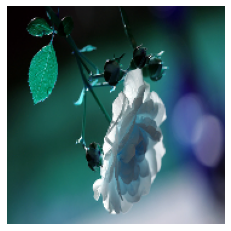

In [ ]:
plt.axis('off')
plt.imshow(X[1])

In [ ]:
data_augmentation(X)[1]

<tf.Tensor: shape=(180, 180, 3), dtype=uint8, numpy=
array([[[ 14,  35,  36],
        [ 13,  35,  36],
        [ 13,  35,  36],
        ...,
        [ 95, 104, 144],
        [ 98, 110, 147],
        [105, 114, 152]],

       [[ 11,  31,  35],
        [ 13,  31,  36],
        [ 12,  31,  35],
        ...,
        [ 93, 100, 143],
        [ 99, 107, 145],
        [102, 111, 151]],

       [[ 11,  30,  35],
        [ 12,  29,  35],
        [ 11,  28,  34],
        ...,
        [ 90,  97, 139],
        [ 95, 103, 142],
        [100, 108, 146]],

       ...,

       [[  6,   3,   2],
        [  6,   2,   2],
        [  7,   3,   3],
        ...,
        [ 38, 112, 113],
        [ 37, 110, 113],
        [ 37, 111, 111]],

       [[  6,   3,   2],
        [  7,   3,   2],
        [  7,   3,   2],
        ...,
        [ 36, 110, 112],
        [ 35, 110, 111],
        [ 34, 109, 109]],

       [[  6,   4,   1],
        [  7,   5,   1],
        [  7,   4,   3],
        ...,
        [ 34, 108, 10

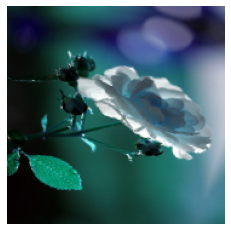

In [ ]:
plt.axis('off')
plt.imshow(data_augmentation(X)[1].numpy().astype("uint8"))

In [ ]:
data_aug = keras.Sequential([
                             layers.experimental.preprocessing.RandomFlip("horizontal", input_shape = (180, 180, 3)),
                             layers.experimental.preprocessing.RandomRotation(0.1),
                             layers.experimental.preprocessing.RandomZoom(0.1)
])

In [ ]:
model = Sequential([
                    data_aug,
                    layers.Conv2D(16, 3, padding='same', activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(32, 3, padding='same', activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(64, 3, padding='same', activation='relu'),
                    layers.MaxPooling2D(),

                    layers.Dropout(0.2),

                    layers.Flatten(),
                    layers.Dense(128, activation='relu'),
                    layers.Dense(5)

])


model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs = 30)

Epoch 1/30
86/86 [==============================] - 96s 1s/step - loss: 1.6568 - accuracy: 0.3352
Epoch 2/30
86/86 [==============================] - 93s 1s/step - loss: 1.1413 - accuracy: 0.5180
Epoch 3/30
86/86 [==============================] - 91s 1s/step - loss: 1.0116 - accuracy: 0.6037
Epoch 4/30
86/86 [==============================] - 94s 1s/step - loss: 0.9026 - accuracy: 0.6339
Epoch 5/30
86/86 [==============================] - 91s 1s/step - loss: 0.8813 - accuracy: 0.6505
Epoch 6/30
86/86 [==============================] - 90s 1s/step - loss: 0.8470 - accuracy: 0.6694
Epoch 7/30
86/86 [==============================] - 91s 1s/step - loss: 0.7770 - accuracy: 0.7021
Epoch 8/30
86/86 [==============================] - 92s 1s/step - loss: 0.7538 - accuracy: 0.7189
Epoch 9/30
86/86 [==============================] - 92s 1s/step - loss: 0.6830 - accuracy: 0.7349
Epoch 10/30
86/86 [==============================] - 92s 1s/step - loss: 0.6798 - accuracy: 0.7362
Epoch 11/30
86/86 [

In [ ]:
model.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 9s 303ms/step - loss: 1.0634 - accuracy: 0.7135


[1.0634163618087769, 0.7135076522827148]